In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data = pd.read_csv("Biomechanical features of orthopedic patients/column_2C_weka.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


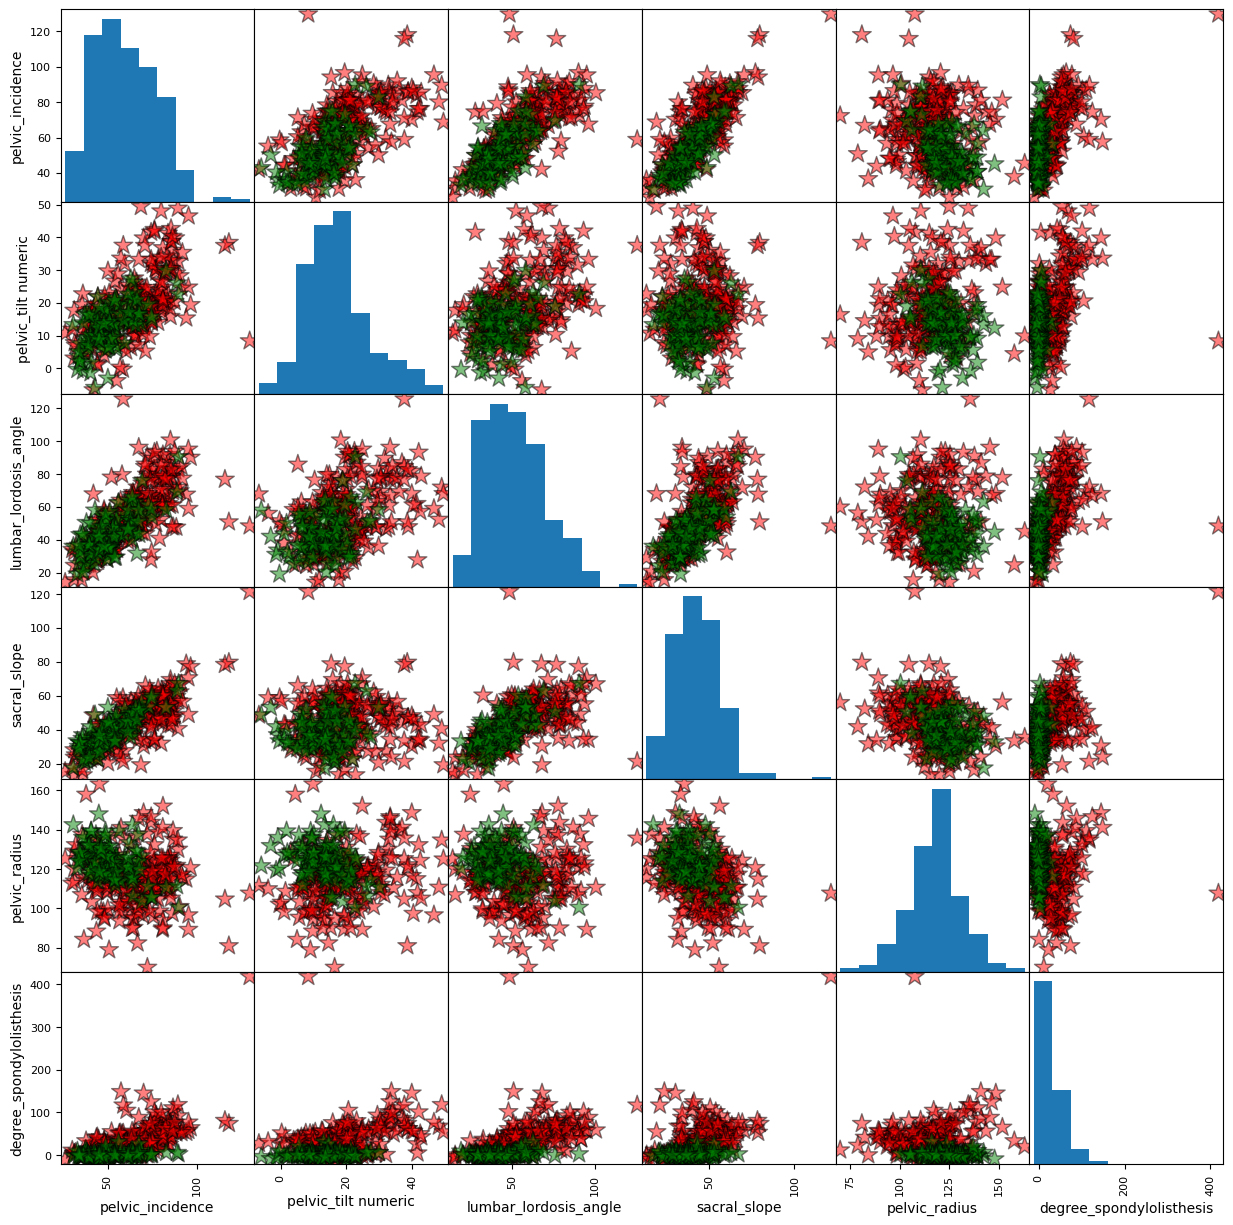

In [8]:
color_list = ['red' if i == 'Abnormal' else 'green' for i in data.loc[:, 'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize=[15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s =200,
                                       marker='*',
                                       edgecolor='black')
plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

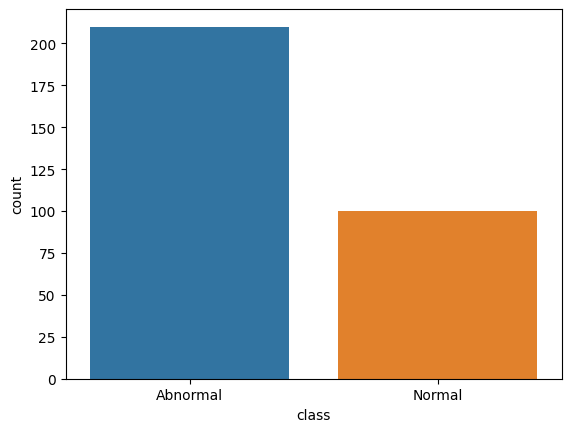

In [13]:
sns.countplot(x='class', data=data);
data.loc[:, 'class'].value_counts()


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
x = data.loc[:, data.columns !='class']
y = data.loc[:, 'class']
knn.fit(x, y)
prediction = knn.predict(x)
print("Prediction: {}".format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors= 4)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.8387096774193549


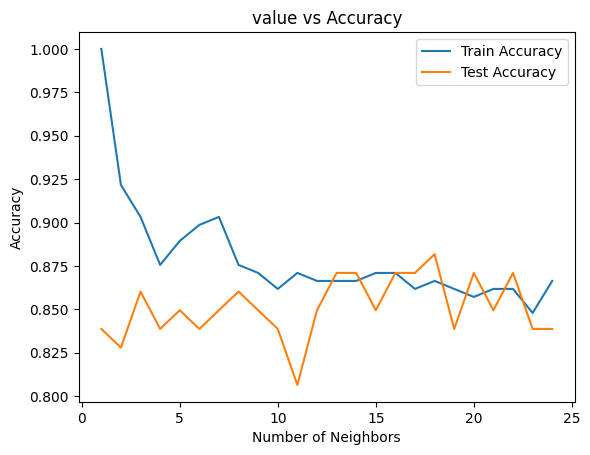

Best Accuracy: 0.8817204301075269 with K = 18


In [30]:
# find key value
neig = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn2 = KNeighborsClassifier(n_neighbors= k)
    knn2.fit(x_train, y_train)
    train_accuracy.append(knn2.score(x_train, y_train))
    test_accuracy.append(knn2.score(x_test, y_test))
    
plt.plot(neig, train_accuracy, label = "Train Accuracy")
plt.plot(neig, test_accuracy, label ="Test Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("value vs Accuracy")
plt.show()
print("Best Accuracy: {} with K = {}".format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))